In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Во склоп на оваа лабораториска вежба ќе го користиме множеството за класификација Letter Recognition data кое соддржи 20000 атрибути и 16 атрибути. Во податоците за множеството е наведено дека нема податоци што недостасуваат, па затоа нема да го проверуваме тоа експлицитно.

Читање на податочното множество

In [12]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/letter-recognition.data',names=['letter','x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx'])
data.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


Визуелизација

Најпрвин проверуваме каква е распределбата на буквите,односно колку пати се наоѓа секоја буква во множеството

[]

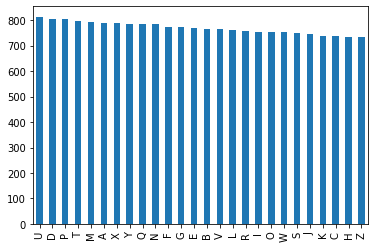

In [13]:
from matplotlib import pyplot as plt

data['letter'].value_counts().plot.bar()
plt.plot()

Печатиме број на атрибути за да се осигураме дека правилно сме го вчитале множеството

In [20]:

feature_names = data.columns.tolist()[1:]
number_of_features = len(feature_names)

print(number_of_features)


16


Ги одвојуваме атрибутите од класите

In [23]:
import numpy as np

X = data.values[:, 1:]
y = data.values[:, 0]

classes_names = np.unique(y)
number_of_classes=len(classes_names)

Хистограм на целото податочно множество за сите атрибути посебно

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

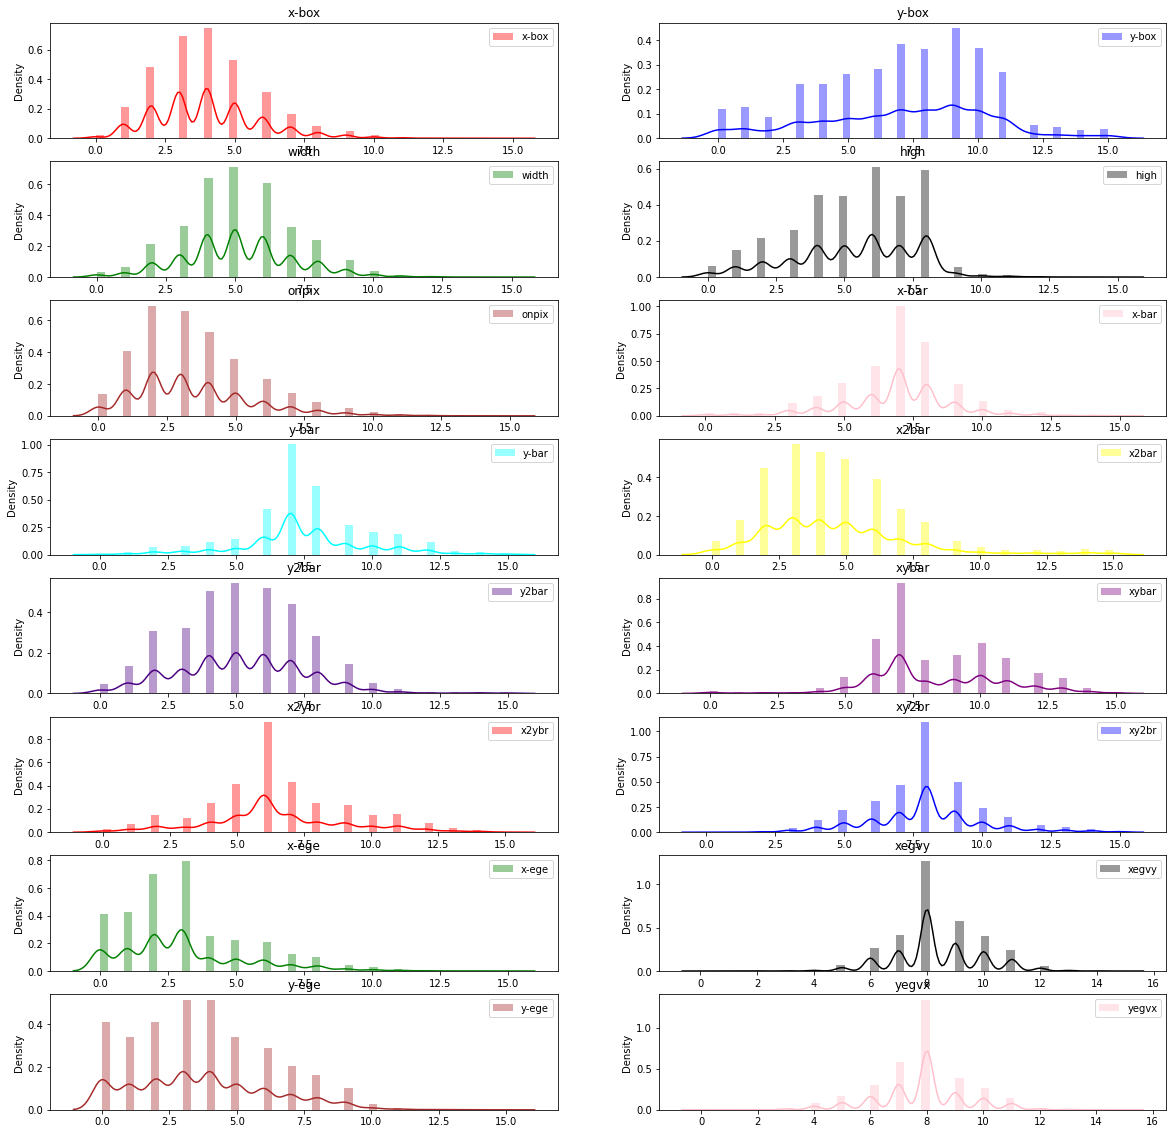

In [17]:
feature_colors = ['red', 'blue', 'green', 'black', 'brown', 'pink', 'cyan', 'yellow', 'indigo', 'purple','red', 'blue', 'green', 'black', 'brown', 'pink', 'cyan']
from matplotlib import  pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(20, 20))
fig.subplots(nrows=8, ncols=2)
for feat_i in range(number_of_features): #For each feature, we have a new subplot
    ax = plt.subplot(8,2, feat_i+1)
    plt.title(feature_names[feat_i])
    column = list(X[:, feat_i])
    sns.distplot(column, label=feature_names[feat_i], color=feature_colors[feat_i]) #Once we have a specific feature, we draw the histogram of the feature's data (X[:,i] means we get the i'th column of X)
    plt.legend()
plt.show()

Хистограм на целото податочно множество за сите атрибути посебно но овојпат визуелизирано за секоја класа посебно

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

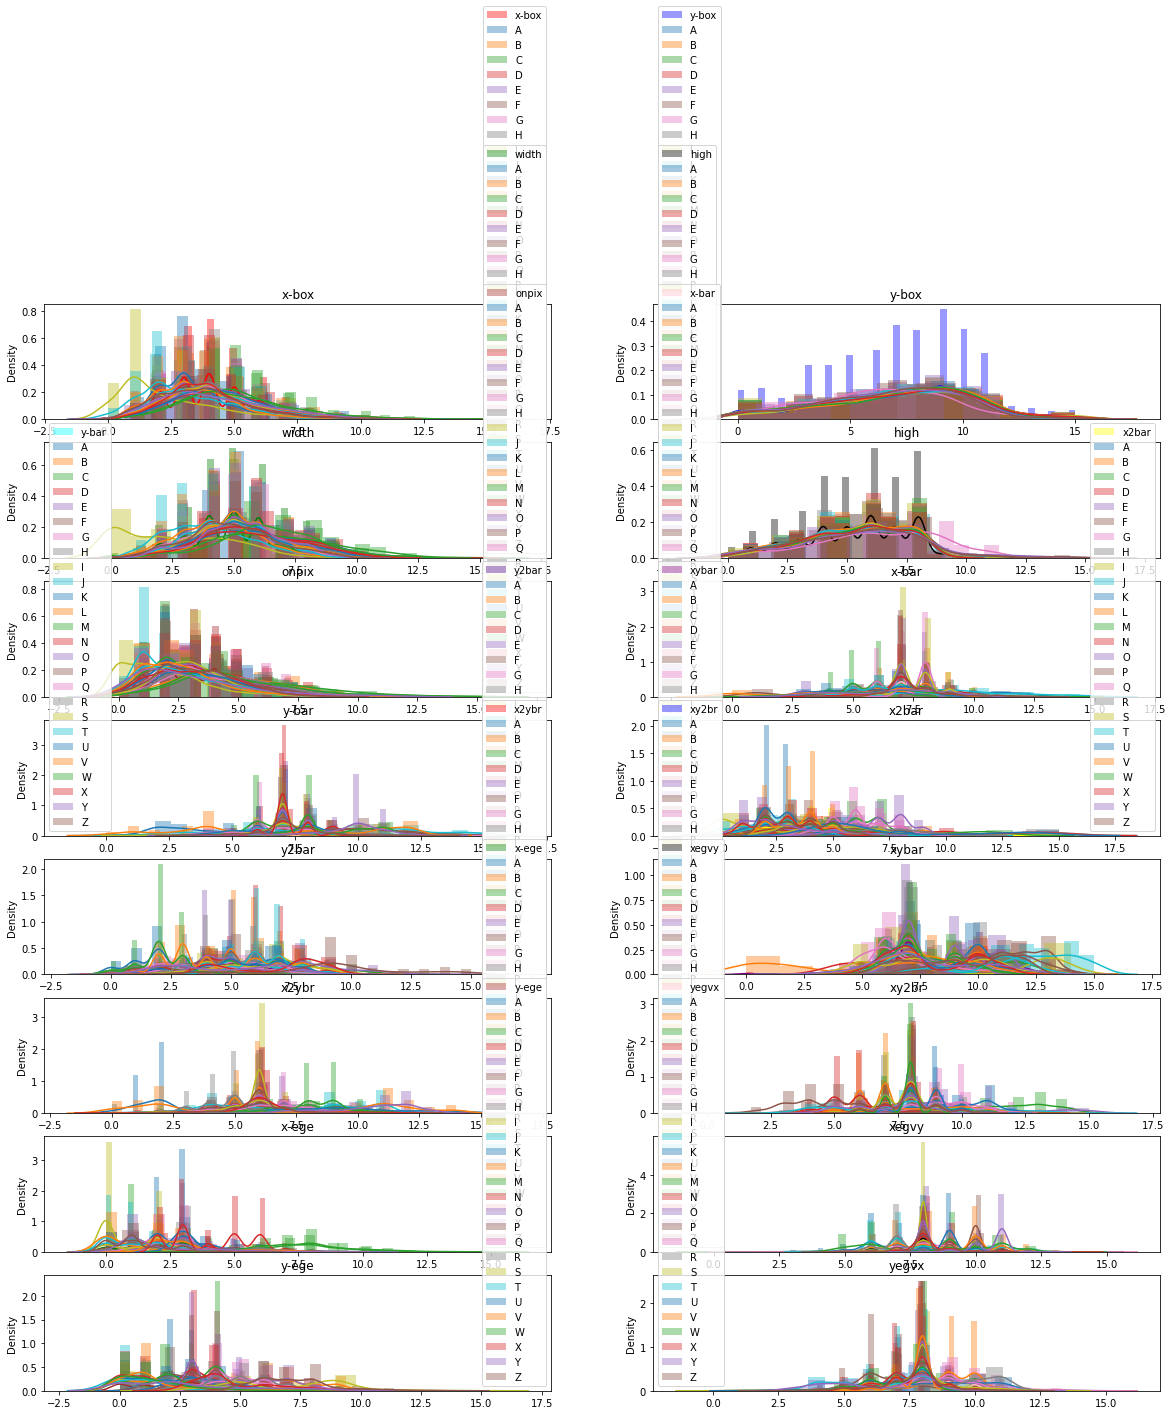

In [24]:
fig = plt.figure(figsize=(20, 20))
fig.subplots(nrows=8, ncols=2)
for feat_i in range(number_of_features): #For each feature, we have a new subplot
    ax = plt.subplot(8,2, feat_i+1)
    plt.title(feature_names[feat_i])
    sns.distplot(X[:,feat_i],label=feature_names[feat_i], color=feature_colors[feat_i])
    for class_i in range(number_of_classes): #After that we draw the within-class histograms of the same feature
        rows=[]
        for i in range(len(y)):
          if y[i][0] == classes_names[class_i]:
            rows.append(i)
        values = X[rows, feat_i]
        sns.distplot(list(values),label=classes_names[class_i]) 
    plt.legend()
plt.show()

Матрица на корелација за да видиме колку атрибутите се зависни едни од други.

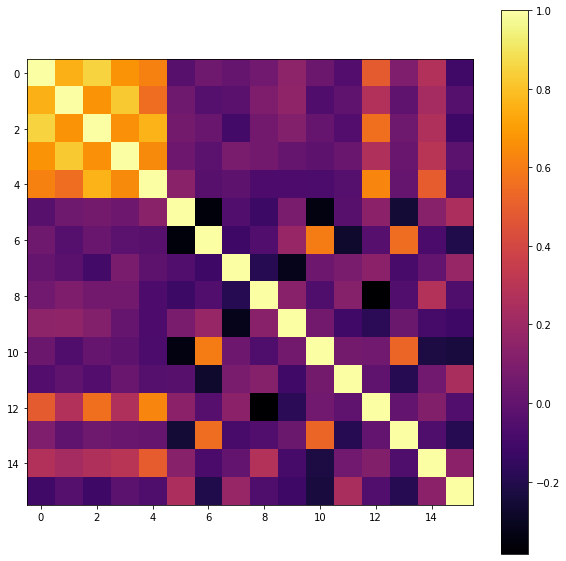

In [27]:
from scipy import stats


correlation_matrix = np.zeros((number_of_features,number_of_features))
for i in range(number_of_features): 
    measure = X[:,i]
    for j in range(number_of_features):
        measure2 = X[:,j]
        corr, _ = stats.pearsonr(measure, measure2)
        correlation_matrix[i][j] = corr
fig = plt.figure(figsize = (10, 10))
plt.imshow(correlation_matrix, cmap = "inferno") 
plt.colorbar()
plt.show()

Поделба на множеството на тренинг и тест дел(80% тренинг дел и 20% тест дел) и проверка на формата на подмножествата




In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
print("X_train {}".format(X_train.shape))
print("y_train {}".format(y_train.shape))
print("X_test  {}".format(X_test.shape))
print("y_test  {}".format(y_test.shape))

X_train (16000, 15)
y_train (16000,)
X_test  (4000, 15)
y_test  (4000,)


Најпрвин ќе класифицираме со LDA

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis() 
lda.fit(X_train, y_train) 
y_pred = lda.predict(X_test) 
print("LDA accuracy:", accuracy_score(y_test, y_pred))
print("LDA precision:", precision_score(y_test, y_pred, average='weighted'))
print("LDA recall:", recall_score(y_test, y_pred, average='weighted'))

LDA accuracy: 0.6985
LDA precision: 0.710455816262497
LDA recall: 0.6985


Класификација со QDA

In [36]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis() 
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test) 
print("QDA accuracy:", accuracy_score(y_test, y_pred))
print("QDA precision:", precision_score(y_test, y_pred, average='weighted'))
print("QDA recall:", recall_score(y_test, y_pred, average='weighted'))

QDA accuracy: 0.869
QDA precision: 0.8713568401866107
QDA recall: 0.869


Увидуваме дека QDA даде многу подобри резултати од LDA.Тоа значи дека претпоставката на LDA за споделена коваријансна матрица во овој случај е погрешна,што имплицира дека е тешко да се најде линеарна сепарабилност на податоците.

Класификација со KNN модел(најпрвин со 2 соседи

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("KNN accuracy:", accuracy_score(y_test, y_pred))
print("KNN precision:", precision_score(y_test, y_pred, average='weighted'))
print("KNN recall:", recall_score(y_test, y_pred, average='weighted'))

KNN accuracy: 0.9375
KNN precision: 0.9405687137715152
KNN recall: 0.9375


KNN со 3 најблиски соседи

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("KNN accuracy:", accuracy_score(y_test, y_pred))
print("KNN precision:", precision_score(y_test, y_pred, average='weighted'))
print("KNN recall:", recall_score(y_test, y_pred, average='weighted'))

KNN accuracy: 0.9505
KNN precision: 0.9513039582749043
KNN recall: 0.9505


KNN со 4 најблиски соседи

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("KNN accuracy:", accuracy_score(y_test, y_pred))
print("KNN precision:", precision_score(y_test, y_pred, average='weighted'))
print("KNN recall:", recall_score(y_test, y_pred, average='weighted'))

KNN accuracy: 0.94525
KNN precision: 0.9464162197031306
KNN recall: 0.94525


Во глобала,сите KNN модели дадоа добри резултати,што значи дека димензионалноста овде не е проблем.

Класификација со Наивен Баесов класификатор

In [41]:
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("NB accuracy:", accuracy_score(y_test, y_pred))
print("NB precision:", precision_score(y_test, y_pred, average='weighted'))
print("NB recall:", recall_score(y_test, y_pred, average='weighted'))

NB accuracy: 0.64625
NB precision: 0.659842757143097
NB recall: 0.64625


Фактот што резултати не се баш најдобри значи дека атрибутите сепак се зависни едни од други

Класификација со модел на Логистичка регресија со различни вредности за регуларизација

In [47]:
from sklearn.linear_model import LogisticRegression

for i in [1, 5, 10]:
    print('C = ', i)
    logreg = LogisticRegression(random_state = 0, C = i,solver='lbfgs',max_iter=5000, multi_class='auto')
    logreg = logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print('\tLogistic Regression Accuracy:', accuracy_score(y_test, y_pred))
    print('\tLogistic Regression Precision:', precision_score(y_test, y_pred, average='weighted'))
    print('\tLogistic Regression Recall:', recall_score(y_test, y_pred, average='weighted'))

C =  1
	Logistic Regression Accuracy: 0.762
	Logistic Regression Precision: 0.7634566350527002
	Logistic Regression Recall: 0.762
C =  5
	Logistic Regression Accuracy: 0.76225
	Logistic Regression Precision: 0.7636174971832667
	Logistic Regression Recall: 0.76225
C =  10
	Logistic Regression Accuracy: 0.76225
	Logistic Regression Precision: 0.7636747554422552
	Logistic Regression Recall: 0.76225


Добиваме приближни резултати за различните вредности на параметарот C.

Класификација со Логистичка регресија со L1 казна(по default e L2).Интуитивно,L1 повеќе се обидува да ја процени медијаната,додека L2 средната вредност на податоците.

In [50]:

logreg = LogisticRegression(penalty = 'l1', random_state = 0,solver='liblinear')
logreg = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Logistic Regression Accuracy using l1 penalty:', accuracy_score(y_test, y_pred))
print('Logistic Regression Precision using l1 penalty:', precision_score(y_test, y_pred, average='weighted'))
print('Logistic Regression Recall using l1 penalty:', recall_score(y_test, y_pred, average='weighted'))

Logistic Regression Accuracy using l1 penalty: 0.70475
Logistic Regression Precision using l1 penalty: 0.7089512089492616
Logistic Regression Recall using l1 penalty: 0.70475


Класификација со SVC-Support Vector Machines

In [53]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X,y)
y_pred = svc.predict(X_test)
print('SVC Accuracy:', accuracy_score(y_test, y_pred))
print('SVC Precision:', precision_score(y_test, y_pred, average='weighted'))
print('SVC Recall:', recall_score(y_test, y_pred, average='weighted'))

SVC Accuracy: 0.93025
SVC Precision: 0.9334256291885309
SVC Recall: 0.93025


Support Vector Machines даде многу добри резултати,што значи дека kernel трикот кој го користи на нелинеарни податоци функционира во овој случај.

Класификација со Невронски мрежи.Го земав готовиот Multi Layer перцептрон класификатор oд sklearn библиотеката.

In [60]:
from sklearn.neural_network import MLPClassifier

Најпрвин ќе пробаме со 1 скриен слој со 64 неврони

In [62]:
mlp = MLPClassifier(hidden_layer_sizes=(64))
mlp.fit(X, y)
y_pred = mlp.predict(X_test)

print('MLP 1 hidden Accuracy:', accuracy_score(y_test, y_pred))
print('MLP 1 hidden Precision:', precision_score(y_test, y_pred, average='weighted'))
print('MLP 1 hidden Recall:', recall_score(y_test, y_pred, average='weighted'))

MLP 1 hidden Accuracy: 0.91775
MLP 1 hidden Precision: 0.9197343747868537
MLP 1 hidden Recall: 0.91775


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Следен модел е со 2 скриени слоеви со по 64,односно 32 неврони во нив.

In [63]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter = 1000)
mlp.fit(X, y)
y_pred = mlp.predict(X_test)

print('MLP 2 hidden Accuracy:', accuracy_score(y_test, y_pred))
print('MLP 2 hidden Precision:', precision_score(y_test, y_pred, average='weighted'))
print('MLP 2 hidden Recall:', recall_score(y_test, y_pred, average='weighted'))

MLP 2 hidden Accuracy: 0.96
MLP 2 hidden Precision: 0.9610688792224188
MLP 2 hidden Recall: 0.96


На крај ќе пробам модел со 3 скриени слоеви,за да увидиме дали зголемувањето на бројот на скриени слоеви доведува до подобрено процесирање,а со тоа и до поголема прецизност во редвидувањето

In [64]:
mlp = MLPClassifier(hidden_layer_sizes=(128,64, 32), max_iter = 10000)
mlp.fit(X, y)
y_pred = mlp.predict(X_test)

print('MLP 3 hidden Accuracy:', accuracy_score(y_test, y_pred))
print('MLP 3 hidden Precision:', precision_score(y_test, y_pred, average='weighted'))
print('MLP 3 hidden Recall:', recall_score(y_test, y_pred, average='weighted'))

MLP 3 hidden Accuracy: 0.98925
MLP 3 hidden Precision: 0.9894143847627694
MLP 3 hidden Recall: 0.98925


Увидуваме дека навистина зголемувањето на бројот на неврони во скриените слоеви,а и на бројот на скриени слоеви носи подобри резултати.

Финален заклучок: Од сите модели со кои експериментирав и кои ги пробав,Multi Layer Перцептронот со 3 скриени слоеви,како и KNN моделите дадоа одлични резултати,додека пак немаше некои модели кои значајно потфрлија,иако резултатите на моделите кои се занимаваат со претпоставки за податоците(како што е Наивниот Баес и неговата претпоставка за независност) немаа баш најповолни резултати.